### Business Problem Understanding
Focus on applying the learnt data analytics concepts and try to share your findings on following aspects:      
a)	What are the highest paid Skills in the US market?     
b)	What are the job categories, which involve above mentioned niche skills?     
c)	Applying clustering concepts, please depict visually what are the different salary ranges based on job category and years of experience.     

### Analysis
<b>a.</b>	What are the highest paid Skills in the US market? – 20 marks      
      <b>i.</b>	Python code which queries on Top 10 Skills with Salary ranges – 15 marks     
      <b>ii.</b>	If student have depicted using graphs, it would be good – 5 marks
 
 
<b>b.</b>	What are the job categories, which involve above mentioned niche skills? – 20 marks      
<b>i.</b>	Python code which queries and depicts Top 10 Job categories with above query result-set skills – 10 marks      
<b>ii.</b>	Graph to be plotted  - 10 marks 



<b>c.</b>	Applying clustering concepts, please depict visually what are the different salary ranges based on job category and years of experience. – 10 marks      
<b>i.</b>	Graphically plot all 3 dependent variables – i.e.  job category, salary and years of experience       
<b>ii.</b>	Graph must be readable and understandable       
<b>iii.</b>	Graph type chosen      
<b>iv.</b>	Graph colour used      
<b>v.</b>	Legend and labels used      


# *** Import Libraries ***#

In [408]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import os
%matplotlib inline
import numpy as np
import pandas as pd 
import re
import os
from datetime import datetime
from collections import Counter
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud ,STOPWORDS, ImageColorGenerator
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import word2vec
import nltk 
import re 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import pandas as pd
import plotly.offline as py
import plotly.tools as tls
from plotly.offline import init_notebook_mode
import plotly.graph_objs as go

# Step 1 Data Preparation
The objective of this instance is to read the data and make it into the readable format                  
<b>a.</b>	Obtain a structure for the data using Python Programming Language – <b>1 marks</b>          
<b>b.</b>	Create the required schema to read the data into the required format into rows and columns – <b>1 marks</b>          
<b>c.</b>	Schema must be normalized, field types must be appropriate as per fields available. Proper data model e.g. – <b>8 marks</b>                
Select the appropriate features (columns) and parse the same, cleanup if required and convert to required categories            

In [65]:
### Read the excel file
newYorkData=pd.read_excel('./data/Worksheet in 2019_Cluster-DSE-IDS_A1_PS2.xlsx')

In [66]:
### Displaying the top 5 records of the data
newYorkData.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,NaN,NaN,...,"Salary range for this position is: $42,405 - $...",NaN,NaN,NaN,NaN,New York City residency is generally required ...,2011-06-24T00:00:00.000,NaN,2011-06-24T00:00:00.000,2019-11-26T00:00:00.000
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,F,...,NaN,"In addition to applying through this website, ...",NaN,NaN,NaN,New York City residency is generally required ...,2012-01-26T00:00:00.000,NaN,2012-01-26T00:00:00.000,2019-11-26T00:00:00.000
2,132292,NYC HOUSING AUTHORITY,External,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle DriverÃ¢â‚¬â„¢s License va...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-11-26T00:00:00.000
3,132292,NYC HOUSING AUTHORITY,Internal,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle DriverÃ¢â‚¬â„¢s License va...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-11-26T00:00:00.000
4,133921,NYC HOUSING AUTHORITY,Internal,50,Temporary Painter,PAINTER,91830,0,Maintenance & Operations,F,...,SPECIAL NOTE: 1. This is a temporary assig...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirement.,2014-01-09T00:00:00.000,NaN,2014-01-08T00:00:00.000,2019-11-26T00:00:00.000


In [67]:
### Displaying the data frame info
newYorkData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3020 entries, 0 to 3019
Data columns (total 28 columns):
Job ID                           3020 non-null int64
Agency                           3020 non-null object
Posting Type                     3020 non-null object
# Of Positions                   3020 non-null int64
Business Title                   3020 non-null object
Civil Service Title              3020 non-null object
Title Code No                    3020 non-null object
Level                            3020 non-null object
Job Category                     3018 non-null object
Full-Time/Part-Time indicator    2811 non-null object
Salary Range From                3020 non-null float64
Salary Range To                  3020 non-null float64
Salary Frequency                 3020 non-null object
Work Location                    3020 non-null object
Division/Work Unit               3020 non-null object
Job Description                  3020 non-null object
Minimum Qual Requirements    

In [68]:
newYorkData.columns

Index(['Job ID', 'Agency', 'Posting Type', '# Of Positions', 'Business Title',
       'Civil Service Title', 'Title Code No', 'Level', 'Job Category',
       'Full-Time/Part-Time indicator', 'Salary Range From', 'Salary Range To',
       'Salary Frequency', 'Work Location', 'Division/Work Unit',
       'Job Description', 'Minimum Qual Requirements', 'Preferred Skills',
       'Additional Information', 'To Apply', 'Hours/Shift', 'Work Location 1',
       'Recruitment Contact', 'Residency Requirement', 'Posting Date',
       'Post Until', 'Posting Updated', 'Process Date'],
      dtype='object')

# Step 2: Identification of Variables – 10 marks
Identify the required variables


<b> Job ID:</b> The Unique Job ID for each opening     
<b> Agency:</b>Deparntment of the Jobs description      
<b>Posting Type:</b> The opening type, whether internal or external, for the job.     
<b>'# of Positions:</b> The number of positions available for a certain opening     
<b>Business Title:</b> The position the candidate would hold.     
<b>Civil Service Title:</b> The Broad Title the position would be classified under     
<b>Title Code No:</b> The Code for a particular title     
<b>Level:</b> The authority the certain opening would bring with it     
<b>Job Category:</b> Broad Classification of where all the jobs would fall in     
<b>Full-time/Part-Time:</b> Time frame of a job.     
<b>Salary Range From:</b> The beginning salary cap for that particular opening     
<b>Salary Range To:</b> The highest cap for that particular job opening.     
<b>Salary Frequency:</b> The payment factor for the job, hourly or annual     
<b>Work Location:</b> The location of the workplace     
<b>Division/Work Unit:</b> Broad working units for all the jobs     
<b>Job Description:</b> A brief idea of what the job will contain     
<b>Minimum Qual Requirements:</b> The minimum qualifications a candidate must possess for the job     
<b>Preferred Skills:</b> Optimal skills which the posting is looking for     
<b>Additional Information:</b> Any additional information provided with the job opening     
<b>Hours/Shift:</b> The timings for the job     
<b>Work Location 1:</b> Additional information for the work location     
<b>Recruitment Contact:</b> Empty field, supposed to contain numbers     
<b>Residency Requirement:</b> Whether the employee must be a resident of NYC.     
<b>Posting date:</b> When the opening was announced.          
<b>Post Until:</b> The closing date.     
<b>Posting Updated:</b> The time when the posting was updated for the opening.     
<b>Process Date:</b> When the posting process was completed     




From the data we can see coloumn <b> Recruitment Contact</b> having all the values null, so we can drop that coloumn

In [69]:
newYorkData.drop(columns="Recruitment Contact",axis=1,inplace=True)

Find the unique value for each column with count of the unique column values

In [60]:
for col in newYorkData:
    print(col," : ",newYorkData[col].unique(), " Count : ",len(newYorkData[col].unique()),'\n' )

Job ID  :  [ 87990  97899 132292 ... 424088 424096 424117]  Count :  1688 

Agency  :  ['DEPARTMENT OF BUSINESS SERV.' 'NYC HOUSING AUTHORITY'
 'DEPT OF HEALTH/MENTAL HYGIENE' 'DEPT OF ENVIRONMENT PROTECTION'
 'LAW DEPARTMENT' 'DEPT OF INFO TECH & TELECOMM'
 'NYC EMPLOYEES RETIREMENT SYS' 'OFFICE OF COLLECTIVE BARGAININ'
 "ADMIN FOR CHILDREN'S SVCS" 'DEPARTMENT OF TRANSPORTATION'
 'POLICE DEPARTMENT' 'OFFICE OF MANAGEMENT & BUDGET' 'BOARD OF CORRECTION'
 'TAXI & LIMOUSINE COMMISSION' 'DEPARTMENT OF PROBATION'
 'DEPARTMENT OF INVESTIGATION' 'BUSINESS INTEGRITY COMMISSION'
 'CIVILIAN COMPLAINT REVIEW BD' 'OFFICE OF THE COMPTROLLER'
 'MANHATTAN COMMUNITY BOARD #8' 'DEPT OF DESIGN & CONSTRUCTION'
 'FINANCIAL INFO SVCS AGENCY' 'DEPARTMENT OF CITY PLANNING'
 'HOUSING PRESERVATION & DVLPMNT' 'DEPT OF YOUTH & COMM DEV SRVS'
 'OFF OF PAYROLL ADMINISTRATION' 'DEPARTMENT OF CORRECTION'
 'DEPARTMENT OF SANITATION' 'HUMAN RIGHTS COMMISSION'
 'BOROUGH PRESIDENT-QUEENS' 'DEPARTMENT FOR THE AGING'
 'H

 'Monday to Friday; 9:00 A.M. to 5:00 P.M.; some evenings and weekends may be required.']  Count :  186 

Work Location 1  :  [nan '42-09 28th Street, Long Island City, NY'
 '96-05 Horace Harding Expway' 'New York, NY'
 '42-09 28th Street, Queens, NY, 11101' 'NY, NY' 'Manhattan, NY'
 '125 Worth Street, NY, NY, 10013' 'Brooklyn, NY' 'Manhattan'
 '55 Water St Ny Ny' '59-17 Junction Blvd Corona Ny' 'City-wide'
 'Citywide - Alternate Work Schedule: Tuesday -Saturday'
 '295 Flatbush Ext Brooklyn' '42-09 28th Street'
 '335 Adams Street, Brooklyn NY' 'Citywide (Travel may be required)'
 '1 Police Plaza, N.Y.' '55 Water Street, N.Y., N.Y.'
 '34-02 Queens Boulevard Long Island City, N.Y. 11101'
 '100 Church St., N.Y.' 'TO BE DETERMINED' '55 Water Street, NY, NY'
 '59-17 Junction Blvd Corona NY 11373' '198 E 161st Street'
 '253 Broadway New York NY'
 '96-05 Horace Harding Expway Corona, NY  11368'
 '1 Bay Street, Staten Island, NY 10301' '253 Broadway New York NY 11373'
 '150-14 Jamaica Avenue, 

# Step 2: Identification of Variables & Step 3: Variable Selection – 20 marks


From the above problem statement we can see that important coloums are required for the analysis are :

<b>Quest 1</b>  What are the highest paid Skills in the US market?    
For above questions we need to create a graph between skills and Salary  therefore the required columns for the graphs creations are   
* Preferrend Skills       
* Salary Range From       
* Salary Range To

<b>Quest 2</b>  What are the job categories, which involve above mentioned niche skills?    
For above questions we need to create a graph between skills and Job Catrgory, Therefore the column required are :  

* Job Category
* Preferrend Skills


<b>Quest 3</b>  Applying clustering concepts, please depict visually what are the different salary ranges based on job category and years of experience.     
For above question, we need to create a cluster graph with three columns are Job category, Salary and years of experience,there fore the columns are required are:

* Job category
* Salary Range From       
* Salary Range To
* Minimum Qual Requirements


Additional Columns are required for further analysis to see the job patterns and trends
* Civil Service Title
* Job Description
* Additional Information:




### Missing Values for each Columns

In [97]:
def emptyValueCheck(emptyColumnsValue):
    colNames = newYorkData.columns
    for col in colNames:
        emptyColumnsValue[col] = 0
        for val in newYorkData[col].values:
            val = str(val)
            if val == "nan":
                emptyColumnsValue[col] += 1
    return emptyColumnsValue

In [98]:
colVal={}
emptyColList=emptyValueCheck(colVal)
(emptyColList)

{'Job ID': 0,
 'Agency': 0,
 'Posting Type': 0,
 '# Of Positions': 0,
 'Business Title': 0,
 'Civil Service Title': 0,
 'Title Code No': 0,
 'Level': 0,
 'Job Category': 2,
 'Full-Time/Part-Time indicator': 209,
 'Salary Range From': 0,
 'Salary Range To': 0,
 'Salary Frequency': 0,
 'Work Location': 0,
 'Division/Work Unit': 0,
 'Job Description': 0,
 'Minimum Qual Requirements': 16,
 'Preferred Skills': 443,
 'Additional Information': 1180,
 'To Apply': 1,
 'Residency Requirement': 2,
 'Posting Date': 2,
 'Posting Updated': 2,
 'Process Date': 2}

### Visualize the missing value at graph level

Text(0.5, 1.0, 'Missing Value Statistics')

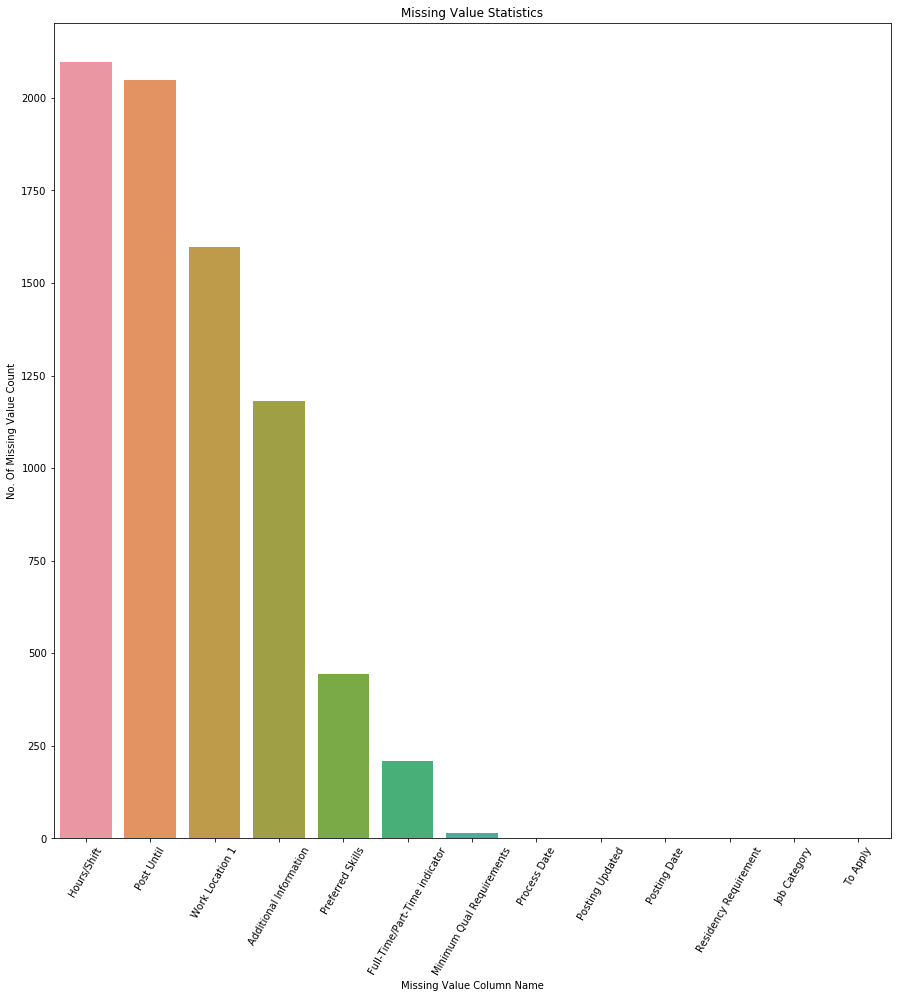

In [89]:
colList = [*emptyColList.keys()]
noOfMissingValues = [*emptyColList.values()]
df = pd.DataFrame({"missingCols":colList,"missingValueCount":noOfMissingValues})

### remove those columns which has not a single missing value
df=df[df['missingValueCount']>0]
df=df.reset_index(drop=True)
newIndex = (df["missingValueCount"].sort_values(ascending = False)).index.values
sortedData = df.reindex(newIndex)
plt.figure(figsize = (15,15))
ax = sns.barplot(x = sortedData["missingCols"],y = sortedData["missingValueCount"])
plt.xticks(rotation = 60)
plt.xlabel("Missing Value Column Name")
plt.ylabel("No. Of Missing Value Count")
plt.title("Missing Value Statistics")

As from the above graph we can conclude that columns Hourly/Shift, Post Until, Work Location 1 having missing value more than <b>40%</b>, there fore we will drop those columns and not consider for further calculation

In [94]:
newYorkData.drop(columns=["Hours/Shift","Work Location 1","Post Until"],axis=1,inplace=True)

In [99]:
colVal={}
emptyColList=emptyValueCheck(colVal)
emptyColList

{'Job ID': 0,
 'Agency': 0,
 'Posting Type': 0,
 '# Of Positions': 0,
 'Business Title': 0,
 'Civil Service Title': 0,
 'Title Code No': 0,
 'Level': 0,
 'Job Category': 2,
 'Full-Time/Part-Time indicator': 209,
 'Salary Range From': 0,
 'Salary Range To': 0,
 'Salary Frequency': 0,
 'Work Location': 0,
 'Division/Work Unit': 0,
 'Job Description': 0,
 'Minimum Qual Requirements': 16,
 'Preferred Skills': 443,
 'Additional Information': 1180,
 'To Apply': 1,
 'Residency Requirement': 2,
 'Posting Date': 2,
 'Posting Updated': 2,
 'Process Date': 2}

From above, we can see the column Job Category, Residency Requirement, posting data , posting updated, process update all have <b> Nan </b> value

In [100]:
newYorkData=newYorkData[~newYorkData['Process Date'].isnull()]
newYorkData=newYorkData.reset_index(drop=True)

In [101]:
colVal={}
emptyColList=emptyValueCheck(colVal)
emptyColList

{'Job ID': 0,
 'Agency': 0,
 'Posting Type': 0,
 '# Of Positions': 0,
 'Business Title': 0,
 'Civil Service Title': 0,
 'Title Code No': 0,
 'Level': 0,
 'Job Category': 2,
 'Full-Time/Part-Time indicator': 209,
 'Salary Range From': 0,
 'Salary Range To': 0,
 'Salary Frequency': 0,
 'Work Location': 0,
 'Division/Work Unit': 0,
 'Job Description': 0,
 'Minimum Qual Requirements': 16,
 'Preferred Skills': 443,
 'Additional Information': 1180,
 'To Apply': 1,
 'Residency Requirement': 0,
 'Posting Date': 0,
 'Posting Updated': 0,
 'Process Date': 0}

# Step 4: Feature Engineering – 10 marks

### 4.1 Get the Top Skills List from Preferred Skills Columns

In [134]:
### copy the Preferred Skills column into skillList part
newYorkData['skillsList']=newYorkData['Preferred Skills'].copy()

In [139]:
description_list=[]
stop_words = set(stopwords.words("english"))
from tqdm import *
for description in tqdm(newYorkData.skillsList):
    description=str(description)
    description = description.lower()
    description = re.sub('[^a-zA-z\s]', '', description)
    description = re.sub('\s+', ' ', description) 
    tokens = nltk.word_tokenize(description)
    description = [i for i in tokens if not i in stop_words]
    lemma = WordNetLemmatizer()
    description = [lemma.lemmatize(word) for word in description]
    description =" ".join(description)
    description_list.append(description)

newYorkData['skillsList']=description_list

100%|████████████████████████████████████████████████████████████████████████████| 3018/3018 [00:02<00:00, 1037.76it/s]


In [163]:
vectorizer = CountVectorizer(ngram_range = (2,2),max_features=30,stop_words="english") 
descriptionMatrix = vectorizer.fit_transform(description_list).toarray()
dictionary = vectorizer.vocabulary_.items()  

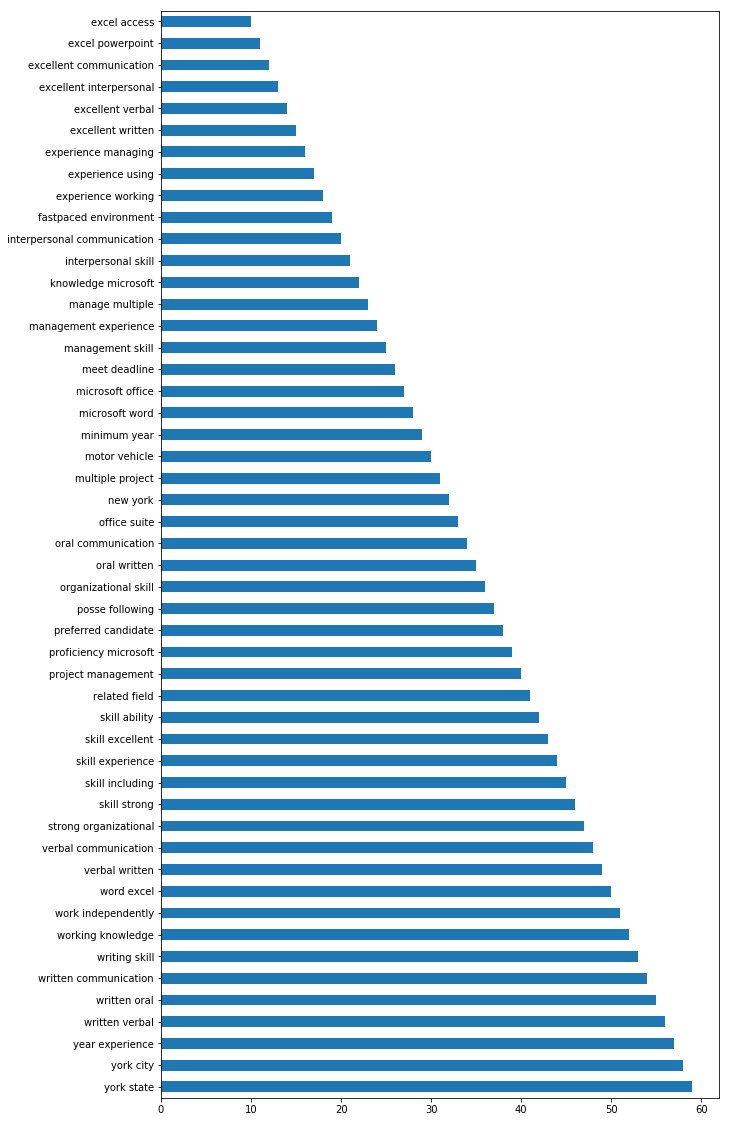

In [165]:
vocab = []
count = []
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
vocab_bef_stem = pd.Series(count, index=vocab)
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)
top_vacab = vocab_bef_stem.head(50)
top_vacab.plot(kind = 'barh', figsize=(10,20))

### 4.2 Do the feature engineering on the Minimum Qual Requirements and pre-process it

In [167]:
newYorkData['minimumRequirement']=newYorkData['Minimum Qual Requirements'].copy()

In [168]:
requirement_list=[]
stop_words = set(stopwords.words("english"))
from tqdm import *
for description in tqdm(newYorkData.minimumRequirement):
    description=str(description)
    description = description.lower()
    description = re.sub('[^a-zA-z\s]', '', description)
    description = re.sub('\s+', ' ', description) 
    tokens = nltk.word_tokenize(description)
    description = [i for i in tokens if not i in stop_words]
    lemma = WordNetLemmatizer()
    description = [lemma.lemmatize(word) for word in description]
    description =" ".join(description)
    requirement_list.append(description)

newYorkData['minimumRequirement']=requirement_list

100%|█████████████████████████████████████████████████████████████████████████████| 3018/3018 [00:05<00:00, 546.69it/s]


In [169]:
newYorkData['minimumRequirement'].head()

0    baccalaureate degree accredited college two ye...
1    baccalaureate degree accredited college univer...
2    three year fulltime satisfactory experience me...
3    three year fulltime satisfactory experience me...
4    five year fulltime satisfactory experience pai...
Name: minimumRequirement, dtype: object

# 5.Step 5: Missing value or data – 10 marks
Most of the missing values are handled at the above steps

In [197]:
### regex to get the year of experience from the minimumRequirement Text Field
newYorkData['yearExperience']=newYorkData['minimumRequirement'].str.extract(r'(\w+)\syear.+experience')

In [198]:
newYorkData['yearExperience'].value_counts()

one        751
two        543
four       485
three      314
five       295
six        153
onehalf     32
seven       17
eight       12
ten          8
least        4
college      4
minimum      2
science      2
nurse        2
Name: yearExperience, dtype: int64

In [218]:
## Analyze the output values to get to know more about the year of Experience
print(newYorkData[newYorkData['yearExperience']=='least']['minimumRequirement'][2952],"\n")
print(newYorkData[newYorkData['yearExperience']=='college']['minimumRequirement'][379],"\n")
print(newYorkData[newYorkData['yearExperience']=='minimum']['minimumRequirement'][823],"\n")
print(newYorkData[newYorkData['yearExperience']=='science']['minimumRequirement'][1662],"\n")
print(newYorkData[newYorkData['yearExperience']=='nurse']['minimumRequirement'][902],"\n")
print(newYorkData[newYorkData['yearExperience']=='onehalf']['minimumRequirement'][2557],"\n")

must least year legal experience following graduation aba accredited law school must admitted practice law state new york 

baccalaureate degree accredited college year satisfactory experience nature described duty responsibility position least year must administrative managerial consultative executive capacity supervising personnel performing activity related duty position combination education andor experience equivalent however candidate must year administrative managerial executive consultative supervisory experience described 

baccalaureate degree accredited college equivalent preferably master degree field public administration business management environmental planning related field minimum year full time satisfactory professional experience field environmental health safety deep understanding title x housing community development act title code federal regulation part hud guideline evaluation control lead based paint hazard housing hud guideline second edition title code feder

In [220]:
year={
        'onehalf':2,
        'one' : 1,
        'least' : 1,
        'college' :1,
        'minimum':1,
        'science':1,
        'nurse':1,
        'two' : 2,
        'three':3,
        'four':4,
        'five':5,
        'six':6,
        'eight':8,
        'seven':7,
        'ten':10,    
}
newYorkData['yearExperienceNumber'] = newYorkData['yearExperience'].map(year)
newYorkData['yearExperienceNumber'].value_counts()

1.0     765
2.0     575
4.0     485
3.0     314
5.0     295
6.0     153
7.0      17
8.0      12
10.0      8
Name: yearExperienceNumber, dtype: int64

In [225]:
# helper functions
def wordCloudData(text):
    wordcloud = WordCloud(background_color='white',
                     width=1024, height=720).generate(text)
    plt.clf()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

def jobCategoryParse(x):
    l = x.replace('&', ',').split(',')
    l = [x.strip().rstrip(',') for x in l]
    jobMainCategories.extend(l)

def parsekeywords(x, l):
    x = x.lower()
    tokens = nltk.word_tokenize(x)
    stop_words = set(stopwords.words('english'))
    token_l = [w for w in tokens if not w in stop_words and w.isalpha()]
    l.extend(token_l)
    
def skillsvsCategories(x):
    kwl = []
    newYorkData[newYorkData['Job Category']==x].skillsvsCategories.dropna().apply(parsekeywords, l=kwl)
    kwl = pd.Series(kwl)
    return kwl.value_counts()[:20]

In [355]:
jobMainCategories = []
newYorkData['Job Category'].dropna().apply(jobCategoryParse)
jobMainCategories = pd.Series(jobMainCategories)
jobMainCategories = jobMainCategories[jobMainCategories!='']
jobMainCategoriesPopular = jobMainCategories.value_counts().iloc[:25]

# Step 6.0 Additional EDA Analysis to see the data relationship

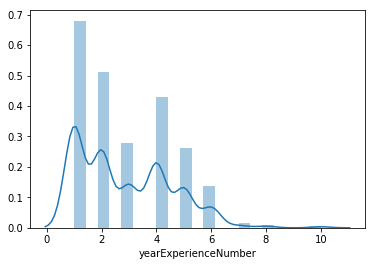

In [221]:
sns.distplot(newYorkData['yearExperienceNumber'].dropna())

Experience Trend

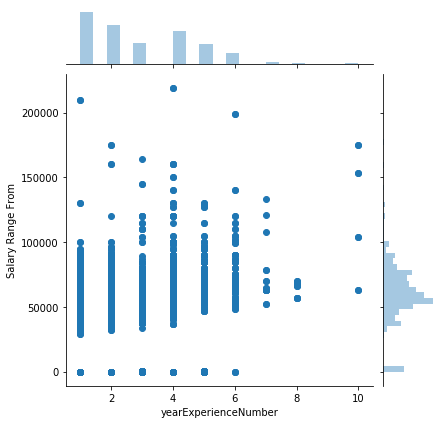

In [222]:
#Only the slightest notable difference in starting salary from years of experiance.
sns.jointplot(x='yearExperienceNumber', y='Salary Range From', data=newYorkData[['yearExperienceNumber','Salary Range From']])

#### Top Job Categories

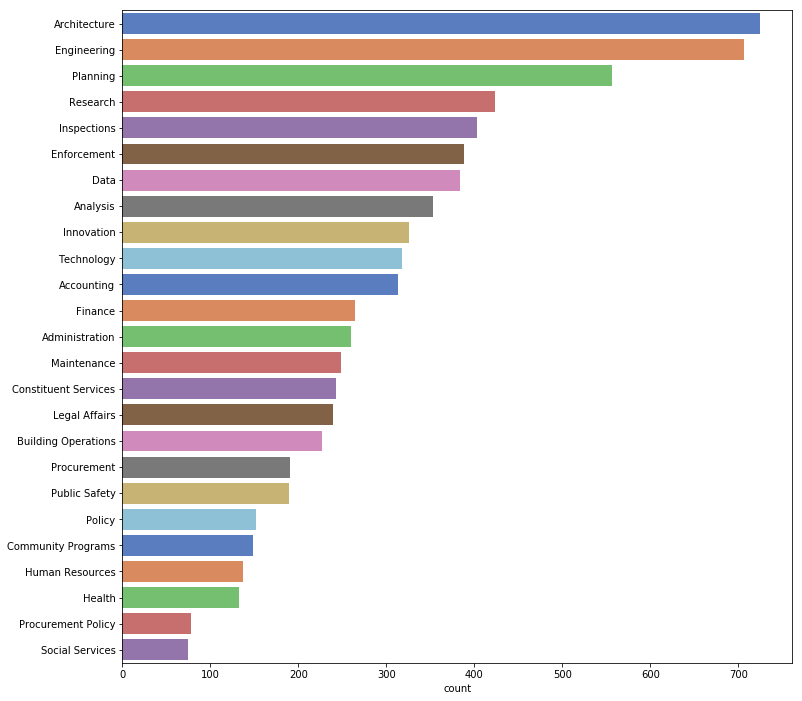

In [230]:
plt.figure(figsize=(12,12))
sns.countplot(y=jobMainCategories, order=jobMainCategoriesPopular.index, palette="muted")

#### Minimum Requirement Word Cloud Representation

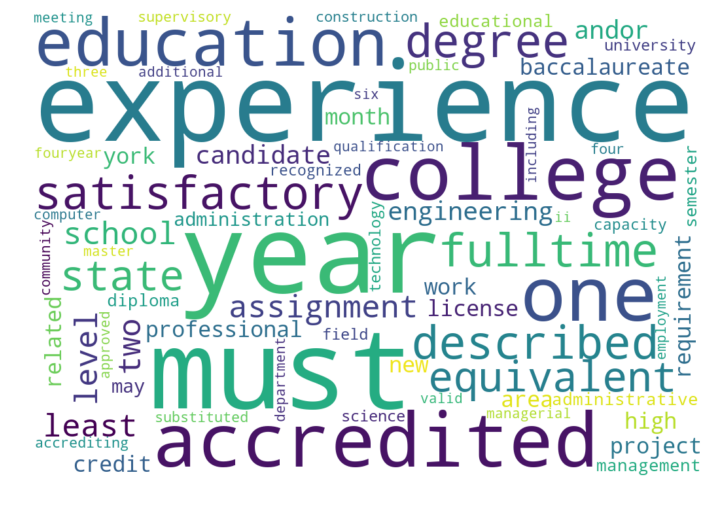

In [287]:
importantQualificationWords = []
newYorkData.minimumRequirement.dropna().apply(parsekeywords, l=importantQualificationWords)
plt.figure(figsize=(12, 12))
counter = Counter(importantQualificationWords)
commonWordsRequirement = [x[0] for x in counter.most_common(70)]
wordCloudData(' '.join(commonWordsRequirement))

# Step 6: Analysis – 50 marks

## What are the highest paid Skills in the US market?

In [346]:
newYorkData['']

0                                                     NaN
1                                                     NaN
2                                Maintenance & Operations
3                                Maintenance & Operations
4                                Maintenance & Operations
                              ...                        
3013            Public Safety, Inspections, & Enforcement
3014                     Administration & Human Resources
3015                     Administration & Human Resources
3016    Constituent Services & Community Programs Soci...
3017    Constituent Services & Community Programs Soci...
Name: Job Category, Length: 3018, dtype: object

In [347]:
skillvsSalaries = newYorkData[['skillsList', 'Salary Range From', 'Salary Range To','Job Category']]
skillvsSalaries.columns=['skillsList','minSalary','maxSalary','jobCategory']

In [348]:
top10MaxSalaryWithSkills=pd.DataFrame(skillvsSalaries.groupby(['skillsList'])['maxSalary'].mean().nlargest(10)).reset_index()

### Top 10 Highest Paid Skills in US (using Count Vectorizer)

In [349]:
vectorizer = CountVectorizer(ngram_range = (3,3),max_features=60,stop_words="english") 
descriptionMatrix = vectorizer.fit_transform(top10MaxSalaryWithSkills['skillsList'].tolist()).toarray()
dictionary = vectorizer.vocabulary_.items()  

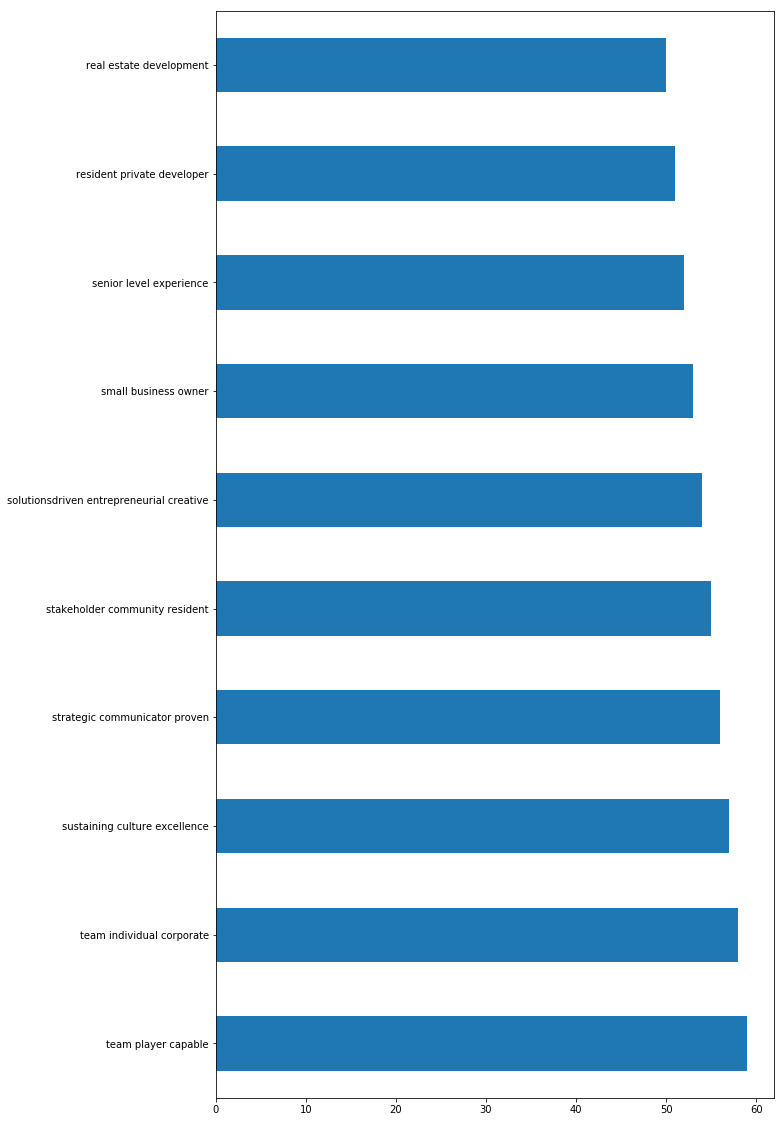

In [350]:
vocab = []
count = []
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
vocab_bef_stem = pd.Series(count, index=vocab)
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)
top_vacab = vocab_bef_stem.head(10)
top_vacab.plot(kind = 'barh', figsize=(10,20))

In [351]:
print("The top 10 Highest Paid Skills in US are","\n")
print(top_vacab)

The top 10 Highest Paid Skills in US are 

team player capable                         59
team individual corporate                   58
sustaining culture excellence               57
strategic communicator proven               56
stakeholder community resident              55
solutionsdriven entrepreneurial creative    54
small business owner                        53
senior level experience                     52
resident private developer                  51
real estate development                     50
dtype: int64


## What are the job categories, which involve above mentioned niche skills? 

In [377]:
top10JobCategories=skillvsSalaries['jobCategory'].dropna().tolist()

In [378]:
complete10JobCategories=[]
for value in top10JobCategories:
    tempList=value.split(',')
    complete10JobCategories.append("".join(tempList))

In [381]:
values, counts = np.unique(complete10JobCategories, return_counts=True)

In [385]:
top10JobsCategoriesDF=pd.DataFrame({'jobCategories':values, 'count':counts})

In [389]:
top10JobsCategoriesDF=top10JobsCategoriesDF.sort_values(['count'],ascending=False)
top10JobsCategoriesDF=top10JobsCategoriesDF.reset_index(drop=True)

In [393]:
print("The Top 10 Job Categories")
top10JobsCategoriesDF=top10JobsCategoriesDF[0:10]
top10JobsCategoriesDF

The Top 10 Job Categories


,jobCategories,count
0,Engineering Architecture & Planning,545
1,Technology Data & Innovation,283
2,Legal Affairs,239
3,Building Operations & Maintenance,209
4,Public Safety Inspections & Enforcement,181
5,Finance Accounting & Procurement,164
6,Constituent Services & Community Programs,144
7,Administration & Human Resources,137
8,Health,132
9,Policy Research & Analysis,118


Text(0.5, 1.0, 'Top 10 Job Catgories in US with Highest Paid Skills')

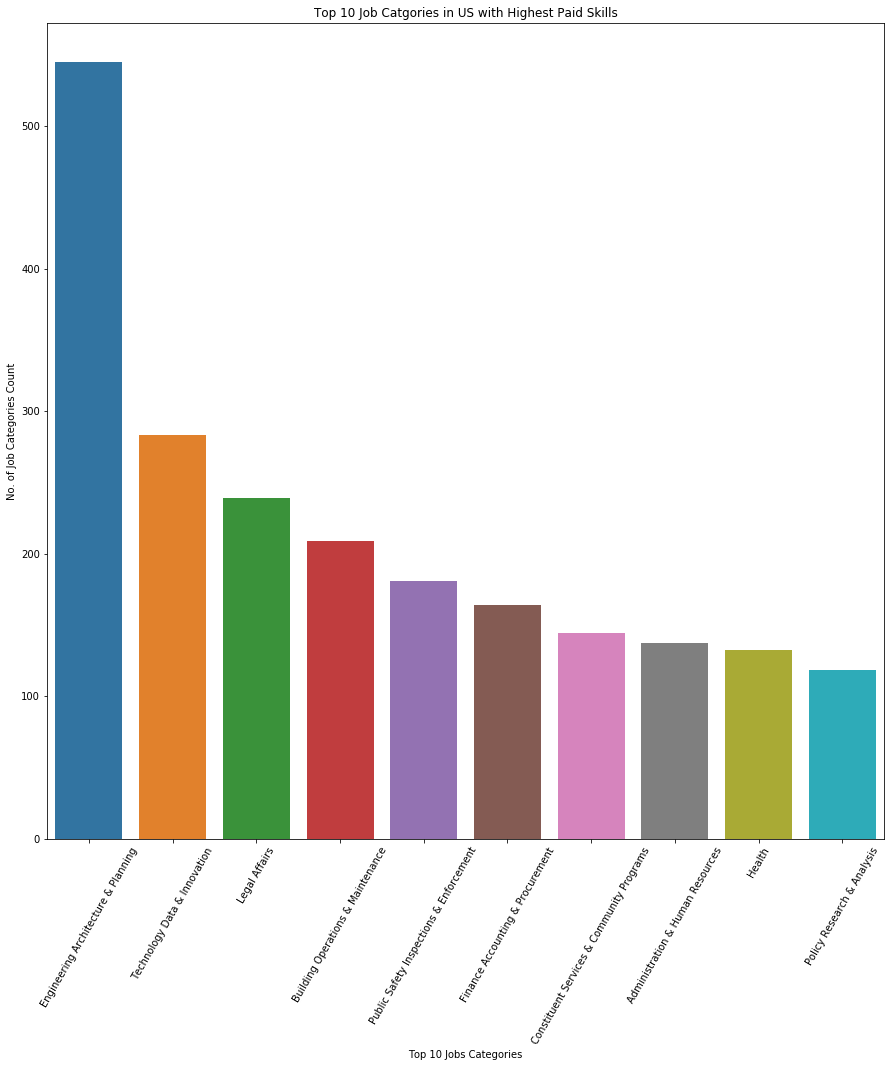

In [396]:
plt.figure(figsize = (15,15))
ax = sns.barplot(x = top10JobsCategoriesDF["jobCategories"],y = top10JobsCategoriesDF["count"])
plt.xticks(rotation = 60)
plt.xlabel("Top 10 Jobs Categories")
plt.ylabel("No. of Job Categories Count")
plt.title("Top 10 Job Catgories in US with Highest Paid Skills")

## Applying clustering concepts, please depict visually what are the different salary ranges based on job category and years of experience.

In [397]:
newYorkData.columns

Index(['Job ID', 'Agency', 'Posting Type', '# Of Positions', 'Business Title',
       'Civil Service Title', 'Title Code No', 'Level', 'Job Category',
       'Full-Time/Part-Time indicator', 'Salary Range From', 'Salary Range To',
       'Salary Frequency', 'Work Location', 'Division/Work Unit',
       'Job Description', 'Minimum Qual Requirements', 'Preferred Skills',
       'Additional Information', 'To Apply', 'Residency Requirement',
       'Posting Date', 'Posting Updated', 'Process Date', 'experience',
       'skillsList', 'minimumRequirement', 'yearExperience', 'yearExperience1',
       'yearExperienceNumber'],
      dtype='object')

In [405]:
clusterDataSet=newYorkData[['Salary Range From','Salary Range To','yearExperienceNumber',"Job Category"]]
clusterDataSet.columns=['minSalary','maxSalary','experience','jobCategory']

In [406]:
clusterDataSet=clusterDataSet.dropna()
clusterDataSet=clusterDataSet.reset_index(drop=True)

In [416]:
topData=clusterDataSet.sort_values(['maxSalary'],ascending=False)[0:50]
topData=topData.reset_index(drop=True)

In [417]:
plt.style.use('ggplot')


In [420]:
trace = go.Scatter(y = topData['jobCategory'],x = topData['maxSalary'],mode='markers',
                   marker=dict(size= topData['experience'],
                               color = topData['experience'],
                               colorscale='Viridis',
                               showscale=True,
                               colorbar = dict(title = 'Experience in Years')),
                   text = topData['experience'].values)

data = [(trace)]

layout= go.Layout(autosize= False, width = 1000, height = 750,
                  title= 'Top 20 Jobs Categories with Highest Paid Skills',
                  hovermode= 'closest',
                  xaxis=dict(showgrid=False,zeroline=False,
                             showline=False),
                  yaxis=dict(title= 'Job Categories',ticklen= 0.1,
                             gridwidth= 100,showgrid=False,
                             zeroline=True,showline=False),
                  showlegend= False)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)